<h1>Finals Project: Family Income and Expenditure</h1>
<hr>
<h2>Analyst : Elysalyn Barlan and Kyla Caliwan</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings('ignore')

In [2]:
fam_income = pd.read_csv('new_dataset\\Family-Income-and-Expenditure.csv')

In [3]:
fam_income

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
fam_income.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [5]:
fam_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

<h1>Filling Up Nulls</h1>

In [6]:
fam_income.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [7]:
fam_income['Household Head Occupation'] = fam_income['Household Head Occupation'].fillna('Unaccounted')
fam_income['Household Head Class of Worker'] = fam_income['Household Head Class of Worker'].fillna('Unaccounted')
fam_income['Toilet Facilities'] = fam_income['Toilet Facilities'].fillna('Unaccounted')


fam_income.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

In [8]:
fam_income['Region'] = fam_income['Region'].astype('category')
fam_income['Main Source of Income'] = fam_income['Main Source of Income'].astype('category')
fam_income['Household Head Sex'] = fam_income['Household Head Sex'].astype('category')
fam_income['Household Head Marital Status'] = fam_income['Household Head Marital Status'].astype('category')
fam_income['Household Head Highest Grade Completed'] = fam_income['Household Head Highest Grade Completed'].astype('category')
fam_income['Household Head Job or Business Indicator'] = fam_income['Household Head Job or Business Indicator'].astype('category')
fam_income['Household Head Occupation'] = fam_income['Household Head Occupation'].astype('category')
fam_income['Household Head Class of Worker'] = fam_income['Household Head Class of Worker'].astype('category')
fam_income['Type of Household'] = fam_income['Type of Household'].astype('category')
fam_income['Type of Roof'] = fam_income['Type of Roof'].astype('category')
fam_income['Type of Walls'] = fam_income['Type of Walls'].astype('category')
fam_income['Tenure Status'] = fam_income['Tenure Status'].astype('category')
fam_income['Toilet Facilities'] = fam_income['Toilet Facilities'].astype('category')
fam_income['Main Source of Water Supply'] = fam_income['Main Source of Water Supply'].astype('category')

fam_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Total Household Income                         41544 non-null  int64   
 1   Region                                         41544 non-null  category
 2   Total Food Expenditure                         41544 non-null  int64   
 3   Main Source of Income                          41544 non-null  category
 4   Agricultural Household indicator               41544 non-null  int64   
 5   Bread and Cereals Expenditure                  41544 non-null  int64   
 6   Total Rice Expenditure                         41544 non-null  int64   
 7   Meat Expenditure                               41544 non-null  int64   
 8   Total Fish and  marine products Expenditure    41544 non-null  int64   
 9   Fruit Expenditure                      

In [9]:
fam_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Total Household Income                         41544 non-null  int64   
 1   Region                                         41544 non-null  category
 2   Total Food Expenditure                         41544 non-null  int64   
 3   Main Source of Income                          41544 non-null  category
 4   Agricultural Household indicator               41544 non-null  int64   
 5   Bread and Cereals Expenditure                  41544 non-null  int64   
 6   Total Rice Expenditure                         41544 non-null  int64   
 7   Meat Expenditure                               41544 non-null  int64   
 8   Total Fish and  marine products Expenditure    41544 non-null  int64   
 9   Fruit Expenditure                      

<hr>
<h1>QUESTIONS</h1>


<h2>1. Among the expenditure categories of Food, Education, Health, and Housing, which one represents the highest average proportion of household income?</h2>

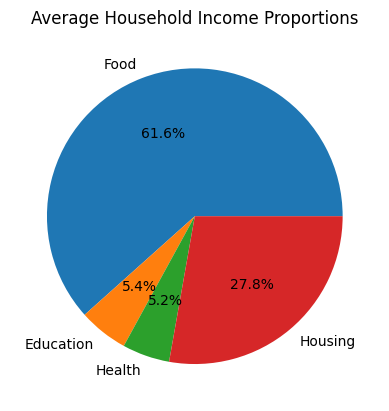

In [10]:
food = fam_income['Total Food Expenditure'].mean()
education = fam_income['Education Expenditure'].mean()
health = fam_income['Medical Care Expenditure'].mean()
housing = fam_income['Housing and water Expenditure'].mean()


values = [food, education, health, housing]
labels = ['Food', 'Education', 'Health', 'Housing']


plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Average Household Income Proportions")
plt.show()

<h4>Insigt:The pie chart reveals that food dominates household spending, consuming 61.6% of average income—more than double the share allocated to housing at 27.8%. Health and education receive minimal portions, each under 6%, suggesting limited investment in long-term well-being and human capital. This distribution highlights a consumption-heavy pattern where basic needs outweigh developmental priorities.</h4>

<h2>2. How does average Income vary by family size?</h2>


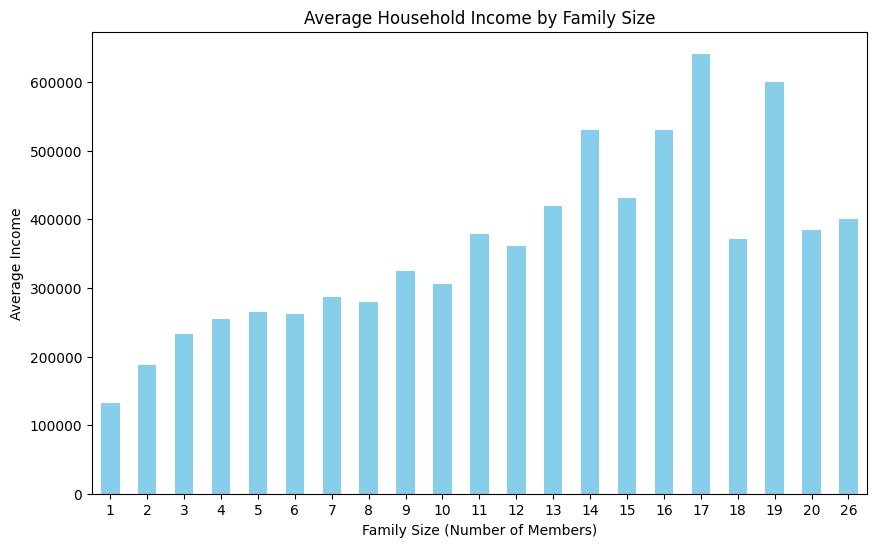

In [11]:
income_by_size = fam_income.groupby('Total Number of Family members')['Total Household Income'].mean()

# Plot bar chart
income_by_size.plot(kind='bar', color='skyblue')
plt.title("Average Household Income by Family Size")
plt.xlabel("Family Size (Number of Members)")
plt.ylabel("Average Income")
plt.gcf().set_size_inches(10, 6)
plt.xticks(rotation=0)
plt.show()

<h4>Inisght: The chart shows that household income generally rises as family size increases, suggesting that larger families may have more earners. Some very large families, like those with 16 or 19 members, stand out with unusually high incomes above ₱600,000. These spikes highlight special cases that may reflect unique economic situations compared to the overall trend.</h4>

<h2>3. This analysis explores how total food budget and family size influence meat expenditure.</h2>



In [12]:
X = fam_income[['Total Food Expenditure', 'Total Number of Family members']]
y = fam_income['Meat Expenditure']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

R² Score: 0.58
RMSE: 6607.87
Intercept: -1151.2393360395417
Coefficients: [ 1.69048405e-01 -5.77631714e+02]


<h4>Insight: The model predicts meat expenditure based on total food spending and family size, with moderate accuracy (R² = 0.58). It shows that meat spending increases with food budget but slightly decreases as family size grows. This means bigger families may spend less on meat per person even if their overall food spending is high.</h4>

<h2>4. Estimating house floor area based on household income and assets.</h2>

In [13]:
X = fam_income[['Total Household Income', 'Number of Television', 'Number of Refrigerator/Freezer', 'Number of Car, Jeep, Van']]
y = fam_income['House Floor Area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

R² Score: 0.14
RMSE: 51.45
Intercept: 31.829318745515177
Coefficients: [3.15126460e-05 1.05093920e+01 1.39551182e+01 1.74082908e+01]


<h4>Insight: The model tries to predict house floor area using income and number of appliances, but it’s not very accurate (R² = 0.14). It shows that having more TVs, refrigerators, and vehicles slightly increases floor area, but income has a very small effect. This means house size isn’t strongly linked to income or assets in this dataset.</h4>

<h2>5. How do regional differences influence household savings rates, defined as the proportion of income remaining after expenditure?</h2>


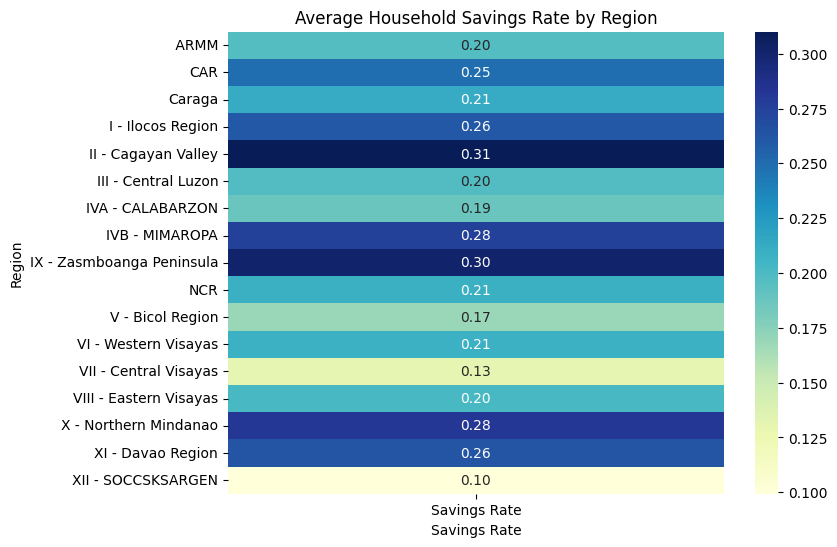

In [14]:
fam_income['Total Expenditure'] = fam_income[['Total Food Expenditure',
                              'Education Expenditure',
                              'Medical Care Expenditure',
                              'Housing and water Expenditure',
                              'Transportation Expenditure',
                              'Communication Expenditure',
                              'Miscellaneous Goods and Services Expenditure',
                              'Special Occasions Expenditure']].sum(axis=1)

# Calculate savings rate
fam_income['Savings Rate'] = (fam_income['Total Household Income'] - fam_income['Total Expenditure']) / fam_income['Total Household Income']

# Average savings rate by region
region_savings = fam_income.groupby('Region')['Savings Rate'].mean().reset_index()

# Simple heatmap
plt.figure(figsize=(8,6))
sns.heatmap(region_savings.pivot_table(index='Region', values='Savings Rate'),
            annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Household Savings Rate by Region")
plt.ylabel("Region")
plt.xlabel("Savings Rate")
plt.show()

<h4>Insight: Some regions like Cagayan Valley and Zamboanga Peninsula have high savings rates, around 30%, showing strong financial habits. Others like Central Visayas and SOCCSKSARGEN have much lower rates, below 15%, which may point to higher spending or lower income. This difference suggests that savings behavior varies a lot depending on the region.</h4>

<h2>6. What are the regional differences in the distribution of household head class of worker, including households categorized as unaccounted?</h2>


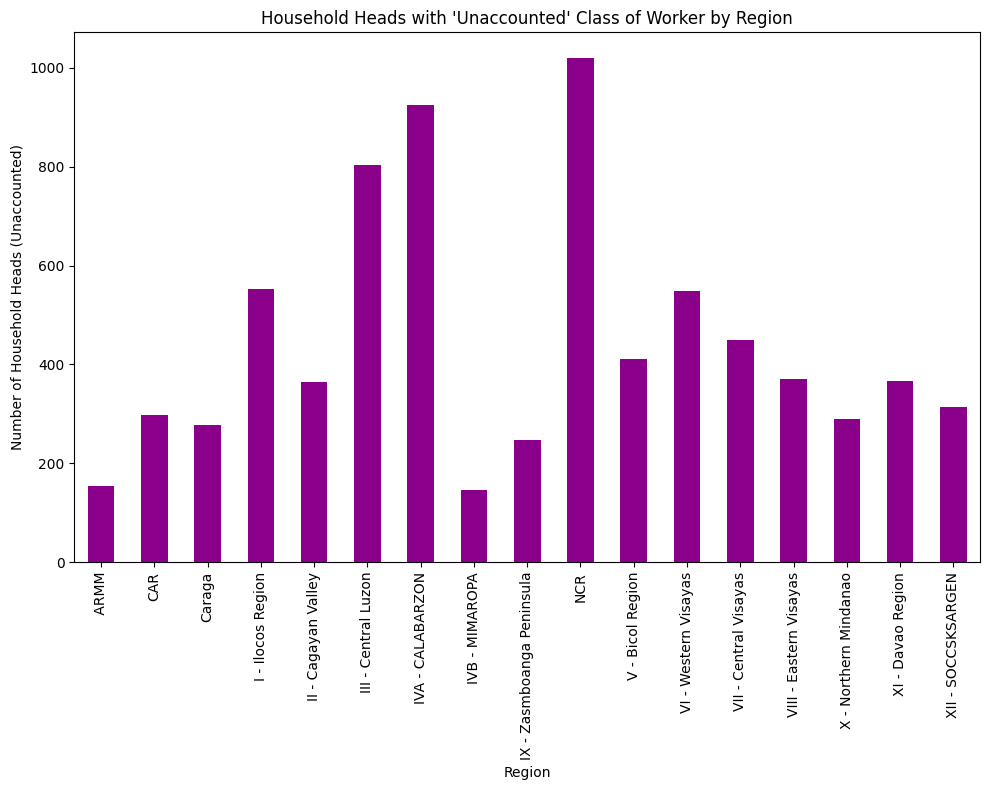

In [15]:
# Filter only rows where Household Head Class of Worker is 'Unaccounted'
unaccounted = fam_income[fam_income['Household Head Class of Worker'] == 'Unaccounted']

# Count households by Region
region_counts = unaccounted['Region'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10,8))
region_counts.plot(kind='bar', color='darkmagenta')

plt.title("Household Heads with 'Unaccounted' Class of Worker by Region")
plt.xlabel("Region")
plt.ylabel("Number of Household Heads (Unaccounted)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h4>Insight: The chart shows that NCR has the highest number of household heads with an “unaccounted” class of worker, followed by CALABARZON and Central Luzon. Regions like ARMM and MIMAROPA have the fewest, meaning employment classification is clearer there. This suggests that some areas may need better tracking or reporting of work status.</h4>

<h2>7. How does total food expenditure differ between households with and without children under 5 years old?</h2>

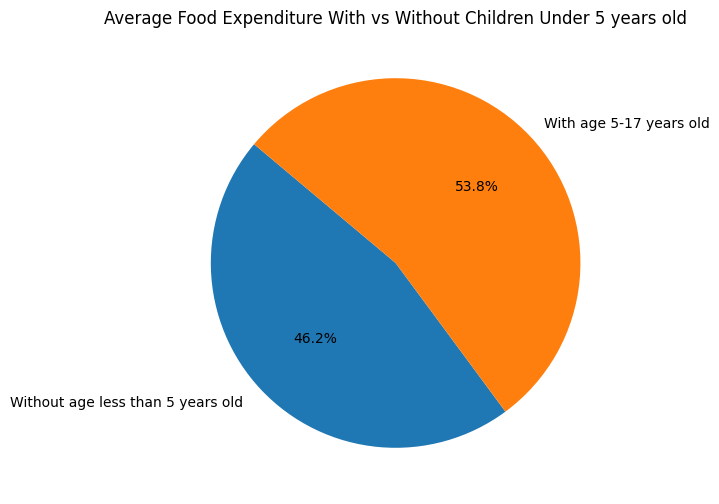

In [16]:
fam_income['Members with age 5 - 17 years old'] = fam_income['Members with age less than 5 year old'] > 0

# Average food expenditure
avg_food = fam_income.groupby('Members with age 5 - 17 years old')['Total Food Expenditure'].mean()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(avg_food, labels=['Without age less than 5 years old ','With age 5-17 years old'], autopct='%1.1f%%', startangle=140)
plt.title("Average Food Expenditure With vs Without Children Under 5 years old")
plt.show()

<h4>Insight: Households with children aged 5–17 years old spend more on food, making up 53.8% of total food expenditure. Those without children under 5 years old account for 46.2%, showing slightly lower spending. This suggests that having school-age children increases food costs for families.</h4>

<h2>8. What is the average household income of families with exactly 5 members compared to those with 10 members?</h2>


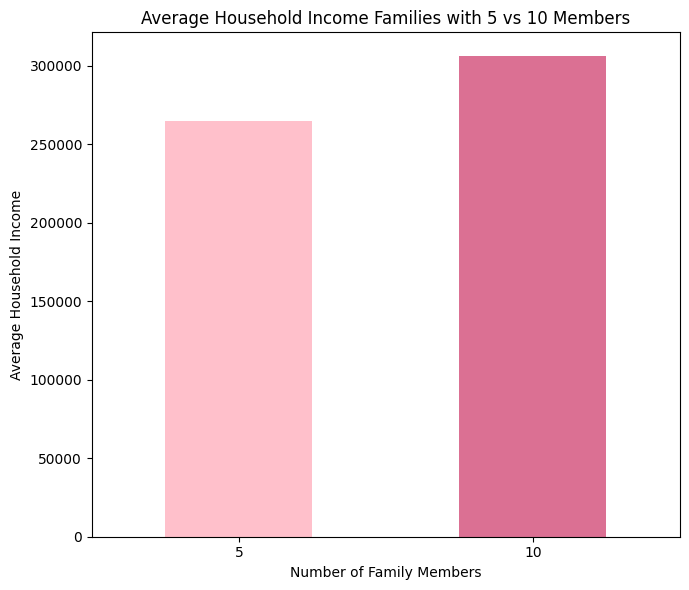

In [17]:
subset = fam_income[fam_income['Total Number of Family members'].isin([5, 10])]


avg_income = subset.groupby('Total Number of Family members')['Total Household Income'].mean()

# Plot bar chart
plt.figure(figsize=(7,6))
avg_income.plot(kind='bar', color=['pink','palevioletred'])

plt.title("Average Household Income Families with 5 vs 10 Members")
plt.xlabel("Number of Family Members")
plt.ylabel("Average Household Income")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h4>Insight: Families with 10 members earn more on average than those with 5, showing that bigger households may have more income contributors. The income difference is around ₱40,000, which suggests that larger families might benefit from multiple earners. However, higher income doesn’t always mean better financial stability, especially with more people to support.</h4>

<h2>9. What factors explain the income gap between households headed by married individuals versus single household heads?</h2>


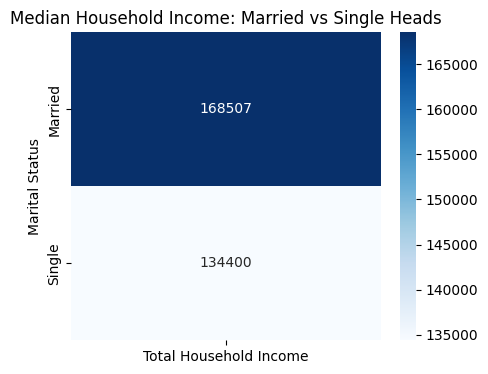

In [18]:
subset = fam_income[fam_income['Household Head Marital Status'].isin(['Married','Single'])]

# Median income by marital status
median_income = subset.groupby('Household Head Marital Status')['Total Household Income'].median().reset_index()

# Pivot for heatmap
pivot = median_income.pivot_table(values='Total Household Income',
                                  index='Household Head Marital Status')

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(pivot, annot=True, cmap='Blues', fmt=".0f")

plt.title("Median Household Income: Married vs Single Heads")
plt.ylabel("Marital Status")
plt.show()

<h4>Insight: Households headed by married individuals earn more on average than those headed by single individuals. The income gap is over ₱34,000, showing that marital status may influence earning capacity. This could be due to dual incomes or more financial stability in married households.</h4>

<h2>10. What proportion of households with 5 members headed by Accountants and auditors own at least one Number of Airconditioner?</h2>

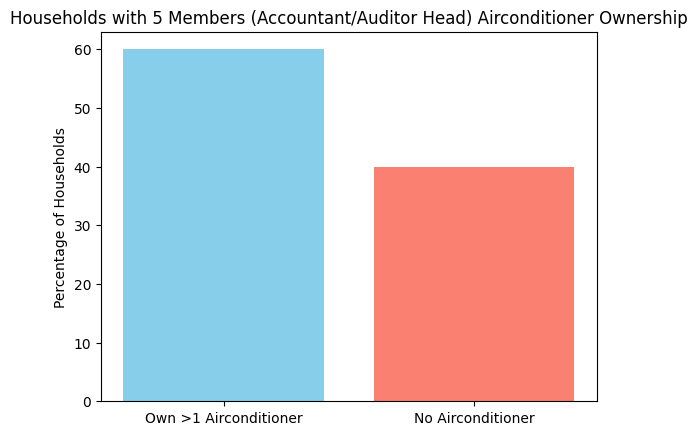

In [19]:
subset = fam_income[(fam_income['Total Number of Family members'] == 5) & 
                    (fam_income['Household Head Occupation'] == 'Accountants and auditors')]

# Proportion owning ≥1 air conditioner
prop = (subset['Number of Airconditioner'] > 0).mean() * 100

# Bar chart
plt.bar(['Own >1 Airconditioner','No Airconditioner'], [prop, 100 - prop], color=['skyblue','salmon'])
plt.title("Households with 5 Members (Accountant/Auditor Head) Airconditioner Ownership")
plt.ylabel("Percentage of Households")
plt.show()

<h4>Insight: Most five-member households led by accountants or auditors show a clear split 60% own multiple air conditioners, while 40% have none at all. This highlights both higher living standards for the majority and a notable portion still without access to this comfort.</h4>